## Business License
Data from business licenses. This will help us looking into licensing situation of the business whether there is tobacco/alcohol licenses or how that is related to the inspection failure. or may help answer if the businesses are more cleaner when they are close to due date for license renewal?  

In [60]:
#important libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set(rc={'figure.figsize':(12, 6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="darkgrid")

In [61]:
business = pd.read_json('../data/raw/business-license.json',
                        convert_dates=['license_start_date'])
business.head(2)
business.info()
date_window = pd.to_datetime('07/01/2016')
business = business[business['license_start_date'] > date_window]
business.to_csv("../data/processed/business_license_start_gt_2016-07-01.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88155 entries, 0 to 9999
Data columns (total 34 columns):
account_number                       88155 non-null int64
address                              88155 non-null object
application_created_date             24305 non-null object
application_requirements_complete    87452 non-null object
application_type                     88155 non-null object
business_activity                    78272 non-null object
business_activity_id                 78272 non-null object
city                                 88151 non-null object
conditional_approval                 88155 non-null object
date_issued                          88155 non-null object
doing_business_as_name               88155 non-null object
expiration_date                      88138 non-null object
id                                   88155 non-null object
latitude                             78074 non-null float64
legal_name                           88155 non-null object
license

In [62]:
date_cols = [
    'application_created_date', 'license_status_change_date', 'payment_date',
    'license_start_date', 'expiration_date', 'date_issued'
]
business = pd.read_csv(
    '../data/processed/business_license_start_gt_2016-07-01.csv',
    parse_dates=date_cols)

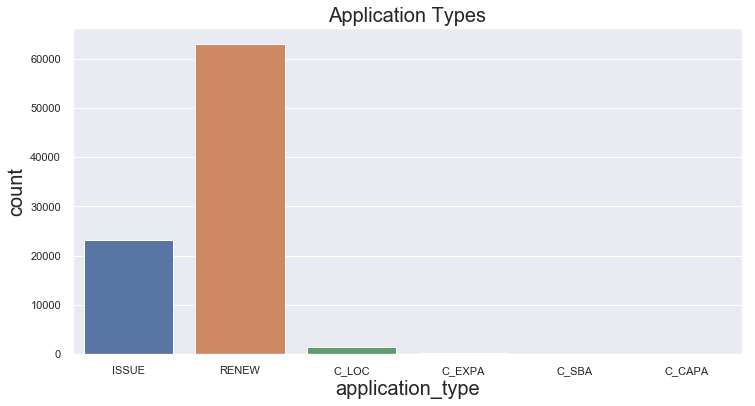

In [63]:
ax = sns.countplot(x="application_type", data=business)
plt.title("Application Types")
plt.show()

APPLICATION TYPE: ‘ISSUE’ is the record associated with the initial license application. ‘RENEW’ is a subsequent renewal record. All renewal records are created with a term start date and term expiration date. ‘C_LOC’ is a change of location record. It means the business moved. ‘C_CAPA’ is a change of capacity record. Only a few license types may file this type of application. ‘C_EXPA’ only applies to businesses that have liquor licenses. It means the business location expanded.

LICENSE STATUS: ‘AAI’ means the license was issued. ‘AAC’ means the license was canceled during its term.‘REV’ means the license was revoked. ‘REA’ means the license revocation has been appealed.

LICENSE STATUS CHANGE DATE: This date corresponds to the date a license was canceled (AAC), revoked (REV) or appealed (REA).

In [64]:
print(business.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88155 entries, 0 to 88154
Data columns (total 35 columns):
Unnamed: 0                           88155 non-null int64
account_number                       88155 non-null int64
address                              88155 non-null object
application_created_date             24305 non-null datetime64[ns]
application_requirements_complete    87452 non-null object
application_type                     88155 non-null object
business_activity                    78272 non-null object
business_activity_id                 78272 non-null object
city                                 88151 non-null object
conditional_approval                 88155 non-null object
date_issued                          88155 non-null datetime64[ns]
doing_business_as_name               88096 non-null object
expiration_date                      88138 non-null datetime64[ns]
id                                   88155 non-null object
latitude                             78074 

In [65]:
columns_to_take = [
    'license_description', 'id', 'business_activity_id',
    'license_code', 'license_number', 'conditional_approval',
    'application_type', 'expiration_date', 'license_start_date',
    'application_requirements_complete', 'conditional_approval',
    'business_activity', 'date_issued', 'license_status_change_date'
]
business = business[columns_to_take]
#column_dict = {}
#for column in columns_to_take:
#    column_dict[column] = column.lower().replace(' ', '_')
#business.rename(columns= column_dict, inplace=True)

business['license_number'] = business['license_number'].astype(int)
cond_approval = {"conditional_approval": {"N": 0, "Y": 1}}
business.replace(cond_approval, inplace=True)

In [66]:
business['HasTobaccoLicense'] = business[
    'license_description'].apply(lambda x: 1 if 'Tobacco' in x else 0)
business['HasAlcoholLicense'] = business[
    'license_description'].apply(
        lambda x: 1
        if 'Consumption on Premises - Incidental Activity' in x else 0)

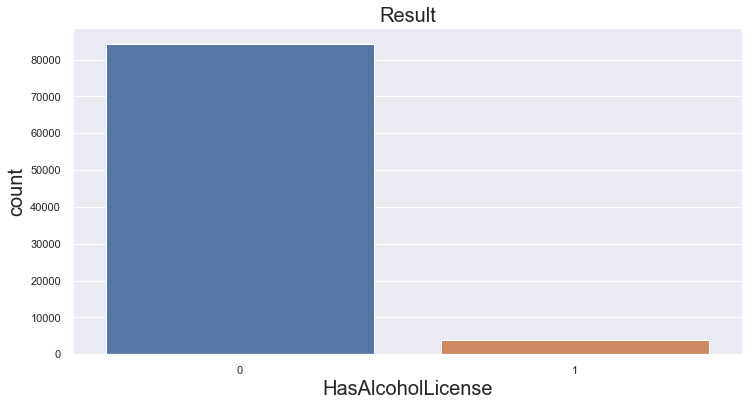

In [67]:
ax = sns.countplot(x="HasAlcoholLicense", data=business)
plt.title("Result")
plt.show()

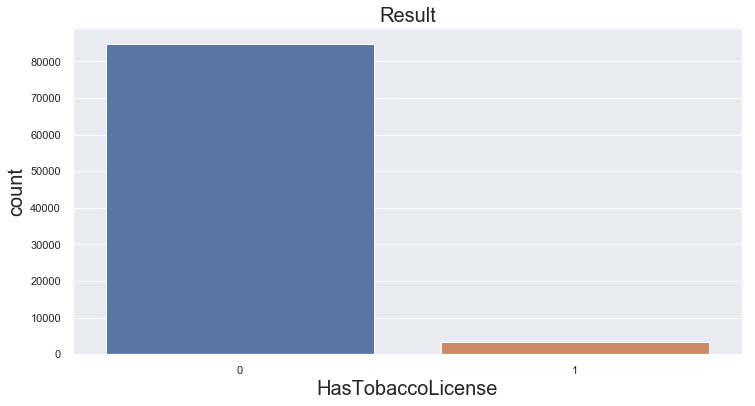

In [68]:
ax = sns.countplot(x="HasTobaccoLicense", data=business)
plt.title("Result")
plt.show()

In [69]:
#food_business['HasTobaccoLicense'] = food_business.apply(lambda x : 1 if (x['license_code'] == 1780) or (x['license_code'] == 1787) else 0, axis=1)
#food_business['HasAlcoholLicense'] = food_business.apply(lambda x : 1 if (x['license_code'] == 1481) | (x['license_code'] == 1475) | (x['license_code'] == 1474) | (x['license_code'] == 1470) else 0 , axis = 1)

In [72]:
business.sort_values('license_start_date', inplace=True)
business = business[business['license_description']=="Retail Food Establishment"]
business = business[(business['application_type'] == "ISSUE") | (business['application_type'] == "RENEW") ]
business = business.drop_duplicates(subset='license_number', keep='first')

In [73]:
business.to_csv('../data/processed/business_data_processed.csv')